In [15]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from torchvision.models import mobilenet_v2
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

model = mobilenet_v2(num_classes = 2)  # Replace with your MobileNetV2 model instantiation
model.load_state_dict(torch.load("mobilenet_v2_state_dict.pth"))
model = model.to(device)


cuda:0


In [16]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])
    
train_set = torchvision.datasets.ImageFolder('./../melanoma_cancer_dataset/train', transform = transform)
test_set = torchvision.datasets.ImageFolder('./../melanoma_cancer_dataset/test', transform = transform)


dataset = torch.utils.data.ConcatDataset([train_set, test_set])

dataloader =  DataLoader(dataset, batch_size=1, shuffle=True, num_workers=4)


In [17]:
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for data in dataloader:
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)
        output = model(inputs.float())
        _, pred = torch.max(output, 1)

        y_true.extend(target.tolist())
        y_pred.extend(pred.tolist())
        

In [18]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Precision: 0.9491
Recall: 0.9455
F1 Score: 0.9453


In [19]:
class_names = ['benign', 'malignant']  # Replace with your actual class names

decoded_true_labels = [class_names[label] for label in y_true]
decoded_pred_labels = [class_names[label] for label in y_pred]

In [20]:
confusion_mat = confusion_matrix(decoded_true_labels, decoded_pred_labels)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[5454   46]
 [ 532 4573]]


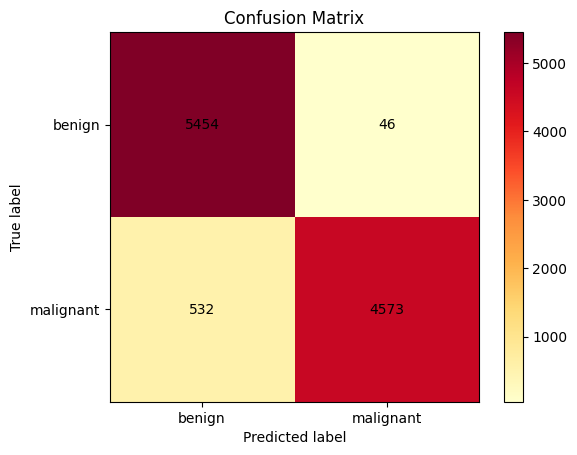

In [21]:
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.YlOrRd)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(confusion_mat.shape[1]),
       yticks=np.arange(confusion_mat.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, confusion_mat[i, j],
                       ha="center", va="center", color="black")

plt.show()


